<b> Image Translation </b>

$$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} x + a \\ y + b \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} a \\ b \end{bmatrix}$$ 


where: x' and y' represent the new coordinates after a shift by a units in the x direction, and b units in the y direction

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from numpy import ndarray

%matplotlib inline

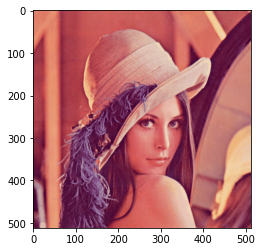

In [2]:
img = cv2.imread("../lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [3]:
def translate(img: ndarray, shift_x: int, shift_y: int) -> ndarray:
    h, w = img.shape[:2]
    
    translate_mat = np.array([[1, 0, shift_x], 
                              [0, 1, shift_y]])
    
    canvas = np.zeros(img.shape, dtype = np.uint8)
    
    for i in range(h):
        for j in range(w):
            original_xy = np.array([j, i, 1])
            
            new_xy = np.dot(translate_mat, original_xy)
            
            if 0 < new_xy[0] < w and 0 < new_xy[1] < h:
                canvas[new_xy[1], new_xy[0]] = img[i, j]
    
    return canvas

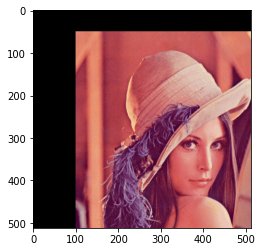

In [4]:
translated_img = translate(img, 100, 50)
plt.imshow(translated_img)